In [82]:
import pandas as pd
import numpy as np

In [83]:
df_obesidad = pd.read_csv('..\INSEGURIDAD_SALUD\porcentaje_obesidad.csv')
df_hipertension = pd.read_csv('..\INSEGURIDAD_SALUD\porcentaje_hipertension.csv')
df_union = pd.read_csv('..\INSEGURIDAD_SALUD\porcentaje_union.csv')
df_inseguridad = pd.read_csv('..\INSEGURIDAD_SALUD\porcentaje_inseguridad.csv')
df_educacion = pd.read_csv('..\INSEGURIDAD_SALUD\porcentaje_educacion.csv')


In [85]:
#eliminar columna cantidad_personas de df_educacion
df_educacion = df_educacion.drop(columns=['cantidad_personas'])

In [86]:
df_total = (df_obesidad
            .merge(df_hipertension, on=['dominio', 'anio', 'poblacion_total_2020'], how='outer')
            .merge(df_union, on=['dominio', 'anio', 'poblacion_total_2020'], how='outer')
            .merge(df_inseguridad, on=['dominio', 'anio', 'poblacion_total_2020'], how='outer')
            .merge(df_educacion, on=['dominio', 'anio', 'poblacion_total_2020'], how='outer'))

#display(df_total)

In [87]:
print(df_total.columns)

Index(['dominio', 'anio', 'cantidad_personas_x', 'total_encuestados_x',
       'porcentaje_obesidad', 'imc_promedio_x',
       'perimetro_abdominal_promedio_x', 'poblacion_total_2020',
       'tasa_obesidad_por_100k', 'cantidad_personas_y', 'total_encuestados_y',
       'porcentaje_hipertension', 'presion_sistolica_promedio_x',
       'presion_diastolica_promedio_x', 'tasa_hipertension_por_100k',
       'cantidad_personas', 'total_encuestados', 'imc_promedio_y',
       'perimetro_abdominal_promedio_y', 'presion_sistolica_promedio_y',
       'presion_diastolica_promedio_y', 'porcentaje_obesidad_hipertension',
       'tasa_union_por_100k', 'cantidad', 'total_denuncias',
       'porcentaje_inseguridad', 'tasa_denuncias_por_100k_inseguridad',
       'asistio_escuela', 'tasa_educacion_por_100k'],
      dtype='object')


In [89]:
df_total = df_total.rename(columns={
    'dominio': 'departamento',
    'anio': 'anio',
    
    'cantidad_personas_x': 'num_personas_obesas',
    'total_encuestados_x': 'num_encuestados_obesidad',
    'porcentaje_obesidad': 'porcentaje_obesidad',
    'imc_promedio_x': 'imc_promedio_obesidad',
    'perimetro_abdominal_promedio_x': 'perimetro_abdominal_promedio_obesidad',
    'tasa_obesidad_por_100k': 'tasa_obesidad_100k',

    'cantidad_personas_y': 'num_personas_hipertensas',
    'total_encuestados_y': 'num_encuestados_hipertension',
    'porcentaje_hipertension': 'porcentaje_hipertension',
    'presion_sistolica_promedio_x': 'presion_sistolica_promedio',
    'presion_diastolica_promedio_x': 'presion_diastolica_promedio',
    'tasa_hipertension_por_100k': 'tasa_hipertension_100k',

    'cantidad_personas': 'num_personas_obesas_hipertensas',
    'total_encuestados': 'num_encuestados_obesidad_hipertension',
    'imc_promedio_y': 'imc_promedio_obesidad_hipertension',
    'perimetro_abdominal_promedio_y': 'perimetro_abdominal_promedio_union',
    'presion_sistolica_promedio_y': 'presion_sistolica_promedio_union',
    'presion_diastolica_promedio_y': 'presion_diastolica_promedio_union',
    'porcentaje_obesidad_hipertension': 'porcentaje_obesidad_hipertension',
    'tasa_union_por_100k': 'tasa_obesidad_hipertension_100k',

    'cantidad': 'num_denuncias_inseguridad',
    'total_denuncias': 'num_total_denuncias',
    'porcentaje_inseguridad': 'porcentaje_inseguridad',
    'tasa_denuncias_por_100k_inseguridad': 'tasa_inseguridad_100k',
    
    'tasa_educacion_por_100k': 'tasa_educacion_100k'
})

#display(df_total)

In [90]:
#elimina la columna poblacion_total_2020
df_total = df_total.drop(columns=['poblacion_total_2020'])

display(df_total)

,departamento,anio,num_personas_obesas,num_encuestados_obesidad,porcentaje_obesidad,imc_promedio_obesidad,perimetro_abdominal_promedio_obesidad,tasa_obesidad_100k,num_personas_hipertensas,num_encuestados_hipertension,...,presion_sistolica_promedio_union,presion_diastolica_promedio_union,porcentaje_obesidad_hipertension,tasa_obesidad_hipertension_100k,num_denuncias_inseguridad,num_total_denuncias,porcentaje_inseguridad,tasa_inseguridad_100k,asistio_escuela,tasa_educacion_100k
0,AMAZONAS,2019,250,1409,5.914360,37.058985,112.060479,52.854905,410,1409,...,145.106302,86.776398,0.831390,17.336409,8127,10822,75.097025,1718.207246,si,271.462791
1,AMAZONAS,2020,647,1427,15.113291,36.720748,112.157273,136.788494,306,1427,...,155.441248,88.562390,0.665732,12.050918,6754,8572,78.791414,1427.928109,si,276.536862
2,AMAZONAS,2021,284,1387,6.825282,36.858170,111.224641,60.043172,428,1387,...,145.390929,87.357560,1.132969,23.256158,10967,14035,78.140363,2318.638965,si,272.308470
3,AMAZONAS,2022,263,1391,6.302420,37.340276,111.999617,55.603360,406,1391,...,146.908670,92.647096,1.054397,18.604926,10043,13787,72.843983,2123.287237,si,270.405693
4,AMAZONAS,2023,267,1393,6.389088,36.659762,111.234350,56.449038,349,1393,...,144.692232,88.854048,0.851195,17.547828,11036,14956,73.789783,2333.226919,si,268.502917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,UCAYALI,2019,312,1245,8.353414,37.332667,111.686412,49.299925,222,1245,...,147.582080,80.749969,0.872060,12.008956,20391,24748,82.394537,3222.034538,si,188.983047
121,UCAYALI,2020,558,1236,15.048544,37.178873,110.246673,88.171020,201,1236,...,139.781916,80.613311,0.862999,10.112805,10547,12865,81.982122,1666.558691,si,188.983047
122,UCAYALI,2021,330,1240,8.870968,37.469910,110.025333,52.144152,255,1240,...,153.823227,90.564874,0.797491,14.063120,9151,12772,71.648920,1445.973128,si,188.667022
123,UCAYALI,2022,337,1247,9.008287,37.615913,109.640387,53.250240,266,1247,...,138.328776,88.171618,1.242983,14.695170,12347,16390,75.332520,1950.981337,si,190.405160


In [ ]:
#df_total.to_csv('..\INSEGURIDAD_SALUD\df_final.csv', index=False)

In [91]:
import scipy.stats as stats
import statsmodels.api as sm
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Estadístico de Shapiro-Wilk: 0.9403, p-valor: 0.0000


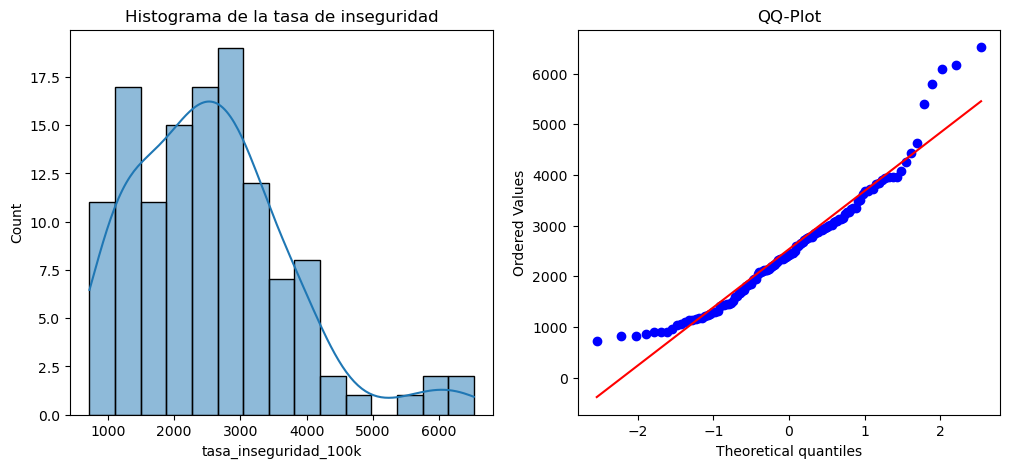

In [92]:
tasa_inseguridad = df_total["tasa_inseguridad_100k"]
stat, p_value = stats.shapiro(tasa_inseguridad)
print(f"Estadístico de Shapiro-Wilk: {stat:.4f}, p-valor: {p_value:.4f}")


# Visualización con histograma y QQ-Plot
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(tasa_inseguridad, kde=True, bins=15)
plt.title("Histograma de la tasa de inseguridad")

plt.subplot(1,2,2)
stats.probplot(tasa_inseguridad, dist="norm", plot=plt)
plt.title("QQ-Plot")

plt.show()

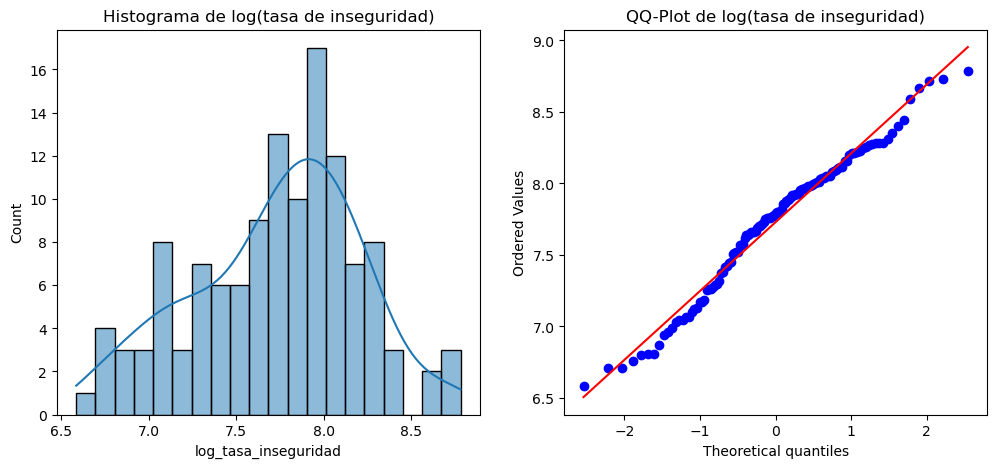

In [93]:
# Transformación logarítmica
df_total["log_tasa_inseguridad"] = np.log1p(df_total["tasa_inseguridad_100k"])  # log(1 + x) evita problemas con ceros

# Histograma y QQ-Plot
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Histograma
sns.histplot(df_total["log_tasa_inseguridad"], bins=20, kde=True, ax=ax[0])
ax[0].set_title("Histograma de log(tasa de inseguridad)")

# QQ-Plot
stats.probplot(df_total["log_tasa_inseguridad"], dist="norm", plot=ax[1])
ax[1].set_title("QQ-Plot de log(tasa de inseguridad)")

plt.show()

In [94]:
# Definir variables predictoras y objetivo
X = df_total[["tasa_hipertension_100k", "tasa_obesidad_100k", "tasa_obesidad_hipertension_100k", "tasa_educacion_100k"]]
y = df_total["log_tasa_inseguridad"]


In [95]:
# Crear la variable rezagada (lag de 1 periodo)
X["log_tasa_lag"] = y.shift(1)  # Rezago de un periodo

C:\Users\dial_\AppData\Local\Temp\ipykernel_17852\1098016049.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["log_tasa_lag"] = y.shift(1)  # Rezago de un periodo


In [96]:
X = X.dropna()
y = y.loc[X.index]  # Asegurar que los índices coincidan

In [121]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [148]:
alphas = np.logspace(-3, 5, 200)  # Exploramos valores grandes de alpha
ridge = RidgeCV(alphas=alphas, store_cv_values=True)
ridge.fit(X_train, y_train)

r2_train = ridge.score(X_train, y_train)
r2_test = ridge.score(X_test, y_test)

c:\Users\dial_\anaconda3\envs\tratado_minds\Lib\site-packages\sklearn\linear_model\_ridge.py:2385: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(


In [149]:
print(f"Mejor alpha: {ridge.alpha_}")
print(f"Coeficientes del modelo: {ridge.coef_}")
print(f"R² de Ridge Regression en entrenamiento: {r2_train:.4f}")
print(f"R² de Ridge Regression en prueba: {r2_test:.4f}")

Mejor alpha: 4.99450511585514
Coeficientes del modelo: [ 0.09864091  0.25321682 -0.17597306 -0.15339084]
R² de Ridge Regression en entrenamiento: 0.4870
R² de Ridge Regression en prueba: 0.5693


In [128]:
if abs(r2_train - r2_test) > 0.1:
    print("\n El modelo podría estar sobreajustado.")
else:
    print("\n El modelo no muestra señales de sobreajuste.")


 El modelo no muestra señales de sobreajuste.


In [129]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Variable"] = [f"PC{i+1}" for i in range(X_pca.shape[1])]
vif_data["VIF"] = [variance_inflation_factor(X_pca, i) for i in range(X_pca.shape[1])]

print("\n VIF de los componentes principales:")
print(vif_data)


 VIF de los componentes principales:
  Variable  VIF
0      PC1  1.0
1      PC2  1.0
2      PC3  1.0
3      PC4  1.0


In [130]:
print(X.columns)

Index(['tasa_hipertension_100k', 'tasa_obesidad_100k',
       'tasa_obesidad_hipertension_100k', 'tasa_educacion_100k',
       'log_tasa_lag'],
      dtype='object')


In [132]:
# Obtener la matriz de carga de los componentes principales
cargas_pca = pd.DataFrame(pca.components_.T, 
                           index=X.columns,  # Usa las 4 variables 
                           columns=["PC1", "PC2", "PC3", "PC4"])  

print(cargas_pca)


                                      PC1       PC2       PC3       PC4
tasa_hipertension_100k           0.492145 -0.187405 -0.356294  0.373980
tasa_obesidad_100k               0.484870 -0.006277  0.663030 -0.501115
tasa_obesidad_hipertension_100k  0.488198 -0.060685 -0.582011 -0.512172
tasa_educacion_100k              0.493685 -0.143015  0.302544  0.576055
log_tasa_lag                     0.201572  0.969899 -0.056357  0.121914
